#### Importing Libraries

In [49]:
%pip install numpy
%pip install nltk
%pip install sklearn
%pip install -U scikit-learn
%pip install stopwords
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saite\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saite\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import string, nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saite\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\saite\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

##### Reading the dataset

In [3]:
df = pd.read_csv('C:/Users/saite/Desktop/Fake_review_Detection/fake reviews dataset.csv')
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [4]:
df.isnull().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [6]:
df.describe()

,rating
count,40432.000000
mean,4.256579
std,1.144354
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [7]:
df['rating'].value_counts()

rating
5.0    24559
4.0     7965
3.0     3786
1.0     2155
2.0     1967
Name: count, dtype: int64

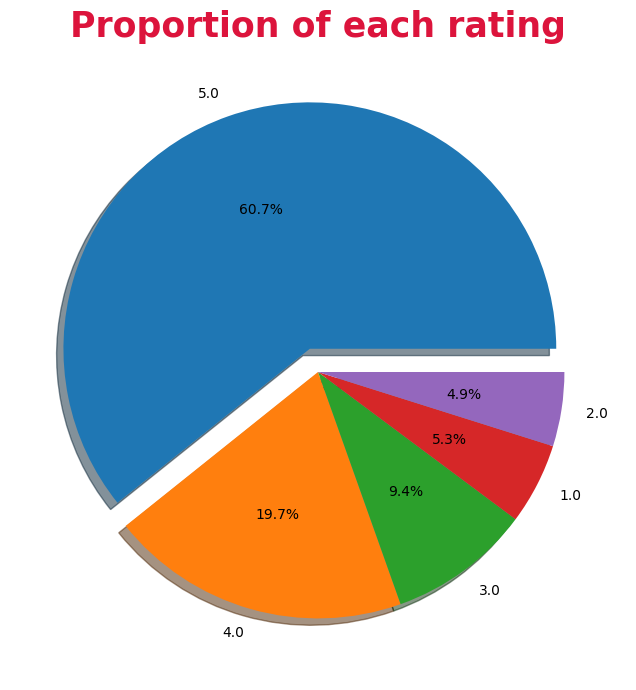

In [8]:
plt.figure(figsize=(15,8))
labels = df['rating'].value_counts().keys()
values = df['rating'].value_counts().values
explode = (0.1,0,0,0,0)
plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%')
plt.title('Proportion of each rating',fontweight='bold',fontsize=25,pad=20,color='crimson')
plt.show()

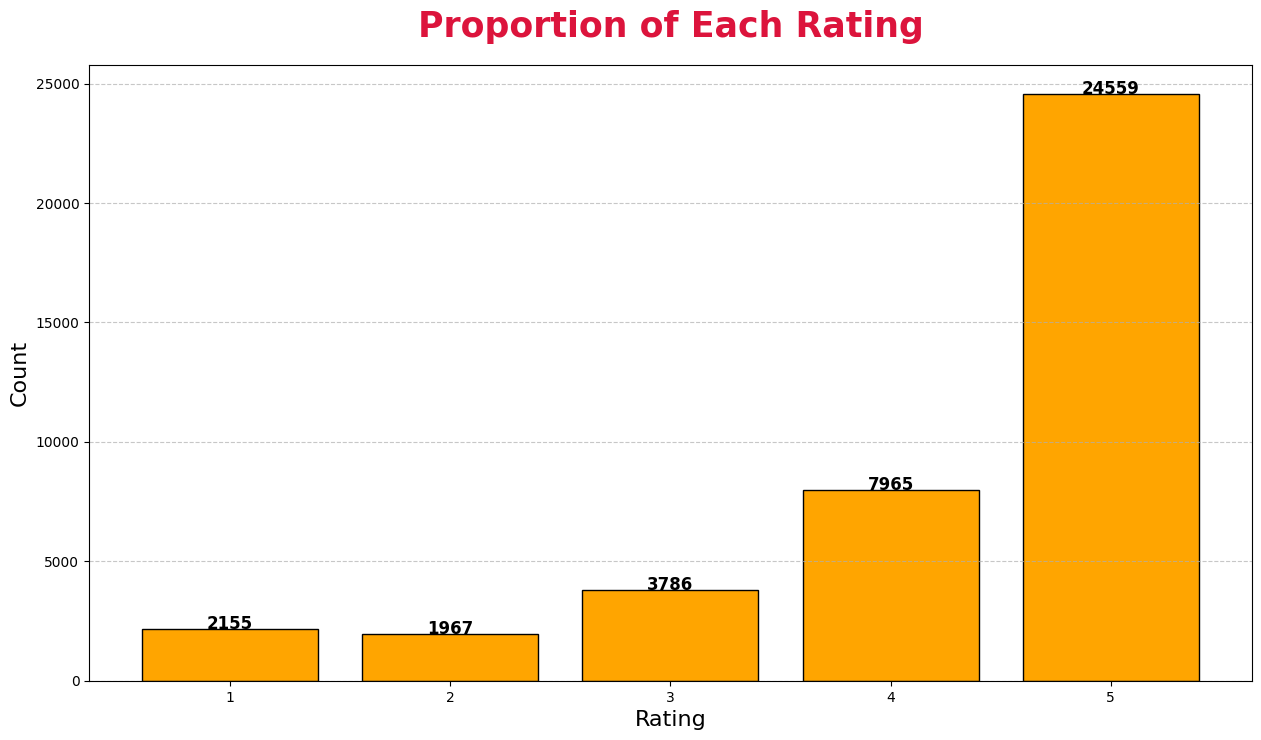

In [9]:
plt.figure(figsize=(15, 8))
labels = df['rating'].value_counts().keys()
values = df['rating'].value_counts().values
bars = plt.bar(labels, values, color='Orange', edgecolor='black')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval}', ha='center', fontsize=12, fontweight='bold')

plt.title('Proportion of Each Rating', fontweight='bold', fontsize=25, pad=20, color='crimson')
plt.xlabel('Rating', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


##### Data Cleaning

In [10]:
def clean_text(text):
    nopunc = [w for w in text if w not in string.punctuation]
    nopunc = ''.join(nopunc)
    return  ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [11]:
df['text_'][0], clean_text(df['text_'][0])

('Love this!  Well made, sturdy, and very comfortable.  I love it!Very pretty',
 'Love Well made sturdy comfortable love itVery pretty')

In [12]:
df.shape

(40432, 4)

In [13]:
df['text_'].head().apply(clean_text)
df['text_'] = df['text_'].astype(str)

In [14]:
def preprocess(text):
    return ' '.join([
        word for word in word_tokenize(text)
        if word.lower() not in stopwords.words('english')
        and not word.isdigit()
        and word not in string.punctuation
    ])

In [15]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def preprocess(text):
    return ' '.join([
        word for word in word_tokenize(text)
        if word.lower() not in stopwords.words('english')
        and not word.isdigit()
        and word not in string.punctuation
    ])


In [16]:
preprocess(df['text_'][500])

"'s working well far wide wooden legs travel trailer upright"

In [17]:
df['text_'][:4032] = df['text_'][:4032].apply(preprocess)

In [18]:
df['text_'] = df['text_'].str.lower()

In [19]:
stemmer = PorterStemmer()
def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])
df['text_'] = df['text_'].apply(lambda x: stem_words(x))

In [20]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
df["text_"] = df["text_"].apply(lambda text: lemmatize_words(text))

In [21]:
df['text_'].head(10)

0         love well made sturdi comfort love pretti
1      love great upgrad origin 've mine coupl year
2            pillow save back love look feel pillow
3               miss inform use great product price
4               nice set good qualiti set two month
5                                want differ flavor
6              perfect touch thing wish littl space
7    done fit well look great love smooth edg extra
8    great big number easi read thing n't like size
9              son love comfort well made also babi
Name: text_, dtype: object

In [22]:
df.to_csv('Preprocessed Fake Reviews Detection Dataset.csv')

##### use the preproceesed Dataset for the below model

In [23]:
df = pd.read_csv('Preprocessed Fake Reviews Detection Dataset.csv')

In [24]:
df.head(50)

,Unnamed: 0,category,rating,label,text_
0,0,Home_and_Kitchen_5,5.0,CG,love well made sturdi comfort love pretti
1,1,Home_and_Kitchen_5,5.0,CG,love great upgrad origin 've mine coupl year
2,2,Home_and_Kitchen_5,5.0,CG,pillow save back love look feel pillow
3,3,Home_and_Kitchen_5,1.0,CG,miss inform use great product price
4,4,Home_and_Kitchen_5,5.0,CG,nice set good qualiti set two month
5,5,Home_and_Kitchen_5,3.0,CG,want differ flavor
6,6,Home_and_Kitchen_5,5.0,CG,perfect touch thing wish littl space
7,7,Home_and_Kitchen_5,3.0,CG,done fit well look great love smooth edg extra
8,8,Home_and_Kitchen_5,5.0,CG,great big number easi read thing n't like size
9,9,Home_and_Kitchen_5,5.0,CG,son love comfort well made also babi


In [25]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [26]:
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,love well made sturdi comfort love pretti
1,Home_and_Kitchen_5,5.0,CG,love great upgrad origin 've mine coupl year
2,Home_and_Kitchen_5,5.0,CG,pillow save back love look feel pillow
3,Home_and_Kitchen_5,1.0,CG,miss inform use great product price
4,Home_and_Kitchen_5,5.0,CG,nice set good qualiti set two month


In [27]:
df.dropna(inplace=True)
df['length'] = df['text_'].apply(len)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
 4   length    40432 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 1.5+ MB


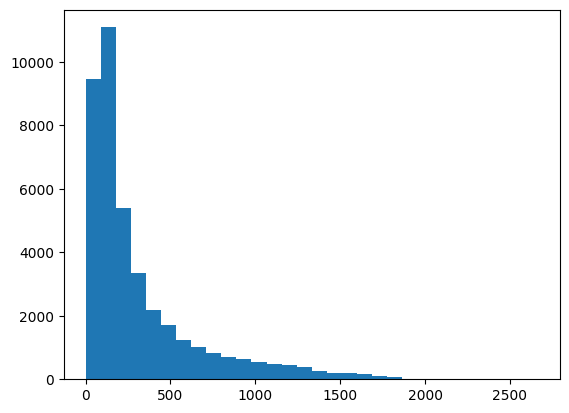

In [28]:
plt.hist(df['length'],bins=30)
plt.show()

In [29]:
df.groupby('label').describe()

rating                                                length  \
         count      mean       std  min  25%  50%  75%  max    count   
label                                                                  
CG     20216.0  4.259893  1.141065  1.0  4.0  5.0  5.0  5.0  20216.0   
OR     20216.0  4.253265  1.147652  1.0  4.0  5.0  5.0  5.0  20216.0   

                                                                  
             mean         std   min    25%    50%    75%     max  
label                                                             
CG     277.022507  285.330858   3.0   87.0  156.0  345.0  1649.0  
OR     357.891522  383.659345  12.0  108.0  200.0  447.0  2660.0

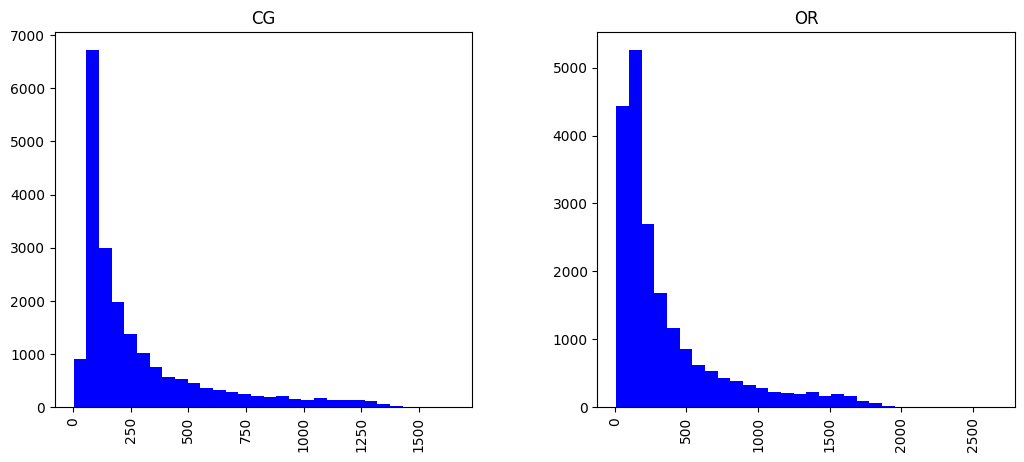

In [30]:
df.hist(column='length',by='label',bins=30,color='blue',figsize=(12,5))
plt.show()

In [31]:
df[df['label']=='OR'][['text_','length']].sort_values(by='length',ascending=False).head().iloc[0].text_

'weak on current science. after see it twice, i agre with much (but not all) of the posit five star reviews. out of respect for those who read reviews, i\'ll not repeat everyth that i like about the presentation. i found the goofi over earrings, hairdo, and facial hair arrang of daniel vitalis, (describ a a "wild food expert") distracting. ugh. ditto for david wolfe, who had an extrem goofi wild hairdo. on the other hand, jon gabriel, describ a an "author and weight loss expert" wa nice groom and a good presenter. hi stori of person transform of a fellow of over 400 pound (whew) to becom a jock of normal weight wa inspiring. christian northrup preserv her rank a one of america\' cutest doctors. a realli nice look woman! present by dr. mercola, jason vale, kri carr, alejandro junger were fine. it wa disappoint to have jami oliv (so popular in the uk) give babi cow growth fluid a pas with unscientif but popular idea on milk. none of the present had anyth (zilch) to say about the work of 

In [32]:
df.length.describe()

count    40432.000000
mean       317.457014
std        340.494139
min          3.000000
25%         95.000000
50%        176.000000
75%        395.000000
max       2660.000000
Name: length, dtype: float64

In [33]:
def text_process(review):
    nopuncuation = []
    for char in review:
        if char not in string.punctuation:
            nopuncuation.append(char)
    nopuncuation = ''.join(nopuncuation)
    words = nopuncuation.split()
    clean_words = []
    for word in words:
        if word.lower() not in stopwords.words('english'):
            clean_words.append(word)
    
    return clean_words


bow_transformer = CountVectorizer(analyzer=text_process)
bow_transformer


,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None
,stop_words,None
,token_pattern,'(?u)\\b\\w\\w+\\b'
,ngram_range,"(1, ...)"
,analyzer,<function tex...002A5D5157BA0>


In [34]:
bow_transformer.fit(df['text_'])
print("Total Vocabulary:",len(bow_transformer.vocabulary_))

Total Vocabulary: 46653


In [35]:
review2 = df['text_'][2]
review2

'pillow save back love look feel pillow'

In [36]:
bow_msg4 = bow_transformer.transform([review2])
print(bow_msg4)
print(bow_msg4.shape)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 6 stored elements and shape (1, 46653)>
  Coords	Values
  (0, 4856)	1
  (0, 15879)	1
  (0, 24920)	1
  (0, 25051)	1
  (0, 31237)	2
  (0, 35797)	1
(1, 46653)


In [37]:
print(bow_transformer.get_feature_names_out()[15879])
print(bow_transformer.get_feature_names_out()[4856])
print(bow_transformer.get_feature_names_out()[35797])

feel
back
save


In [38]:
bow_reviews = bow_transformer.transform(df['text_'])

In [39]:
print("Shape of Bag of Words Transformer for the entire reviews corpus:",bow_reviews.shape)
print("Amount of non zero values in the bag of words model:",bow_reviews.nnz)

Shape of Bag of Words Transformer for the entire reviews corpus: (40432, 46653)
Amount of non zero values in the bag of words model: 1107461


In [40]:
print("Sparsity:",np.round((bow_reviews.nnz/(bow_reviews.shape[0]*bow_reviews.shape[1]))*100,2))

Sparsity: 0.06


In [41]:
tfidf_transformer = TfidfTransformer().fit(bow_reviews)
tfidf_rev4 = tfidf_transformer.transform(bow_msg4)
print(bow_msg4)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 6 stored elements and shape (1, 46653)>
  Coords	Values
  (0, 4856)	1
  (0, 15879)	1
  (0, 24920)	1
  (0, 25051)	1
  (0, 31237)	2
  (0, 35797)	1


In [42]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['orange']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['furniture']])

9.304816469212922
8.662962583040526


In [43]:
tfidf_reviews = tfidf_transformer.transform(bow_reviews)
print("Shape:",tfidf_reviews.shape)
print("No. of Dimensions:",tfidf_reviews.ndim)

Shape: (40432, 46653)
No. of Dimensions: 2


##### Creating Training and Testing Data

In [44]:
review_train, review_test, label_train, label_test = train_test_split(df['text_'],df['label'],test_size=0.2)

In [45]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)), 
    ('tfidf', TfidfTransformer()),                      
    ('classifier', MultinomialNB())              
])


##### Validating Using Multinomial Naive Bayes Algorithm

In [46]:
pipeline.fit(review_train,label_train)

,steps,"[('bow', ...), ('tfidf', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [47]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [48]:
pipeline.fit(review_train,label_train)

,steps,"[('bow', ...), ('tfidf', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [50]:
rfc_pred = pipeline.predict(review_test)
rfc_pred

array(['CG', 'OR', 'OR', ..., 'CG', 'OR', 'CG'],
      shape=(8087,), dtype='<U2')

In [51]:
print('Classification Report:',classification_report(label_test,rfc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,rfc_pred))
print('Accuracy Score:',accuracy_score(label_test,rfc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.83      0.90      0.86      4038
          OR       0.89      0.81      0.85      4049

    accuracy                           0.85      8087
   macro avg       0.86      0.85      0.85      8087
weighted avg       0.86      0.85      0.85      8087

Confusion Matrix: [[3619  419]
 [ 755 3294]]
Accuracy Score: 0.8548287374799061
Model Prediction Accuracy: 85.48%


In [52]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',DecisionTreeClassifier())
])

In [53]:
pipeline.fit(review_train,label_train)

,steps,"[('bow', ...), ('tfidf', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [54]:
dtree_pred = pipeline.predict(review_test)
dtree_pred

array(['CG', 'CG', 'OR', ..., 'CG', 'OR', 'CG'],
      shape=(8087,), dtype=object)

In [55]:
print('Classification Report:',classification_report(label_test,dtree_pred))
print('Confusion Matrix:',confusion_matrix(label_test,dtree_pred))
print('Accuracy Score:',accuracy_score(label_test,dtree_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,dtree_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.73      0.76      0.74      4038
          OR       0.75      0.73      0.74      4049

    accuracy                           0.74      8087
   macro avg       0.74      0.74      0.74      8087
weighted avg       0.74      0.74      0.74      8087

Confusion Matrix: [[3049  989]
 [1101 2948]]
Accuracy Score: 0.7415605292444665
Model Prediction Accuracy: 74.16%


In [56]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',KNeighborsClassifier(n_neighbors=2))
])

In [57]:
pipeline.fit(review_train,label_train)

,steps,"[('bow', ...), ('tfidf', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [58]:
knn_pred = pipeline.predict(review_test)
knn_pred

array(['CG', 'OR', 'CG', ..., 'CG', 'OR', 'CG'],
      shape=(8087,), dtype=object)

In [59]:
print('Classification Report:',classification_report(label_test,knn_pred))
print('Confusion Matrix:',confusion_matrix(label_test,knn_pred))
print('Accuracy Score:',accuracy_score(label_test,knn_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,knn_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.54      0.97      0.69      4038
          OR       0.86      0.18      0.30      4049

    accuracy                           0.57      8087
   macro avg       0.70      0.57      0.50      8087
weighted avg       0.70      0.57      0.50      8087

Confusion Matrix: [[3917  121]
 [3324  725]]
Accuracy Score: 0.5740076666254482
Model Prediction Accuracy: 57.4%


In [60]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',SVC())
])

In [61]:
pipeline.fit(review_train,label_train)

,steps,"[('bow', ...), ('tfidf', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [62]:
svc_pred = pipeline.predict(review_test)
svc_pred

array(['OR', 'OR', 'OR', ..., 'CG', 'OR', 'CG'],
      shape=(8087,), dtype=object)

In [63]:
print('Classification Report:',classification_report(label_test,svc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,svc_pred))
print('Accuracy Score:',accuracy_score(label_test,svc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.90      0.88      0.89      4038
          OR       0.88      0.91      0.89      4049

    accuracy                           0.89      8087
   macro avg       0.89      0.89      0.89      8087
weighted avg       0.89      0.89      0.89      8087

Confusion Matrix: [[3547  491]
 [ 380 3669]]
Accuracy Score: 0.8922962779770002
Model Prediction Accuracy: 89.23%


In [64]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression())
])

In [65]:
pipeline.fit(review_train,label_train)

,steps,"[('bow', ...), ('tfidf', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [66]:
lr_pred = pipeline.predict(review_test)
lr_pred

array(['OR', 'OR', 'OR', ..., 'CG', 'OR', 'CG'],
      shape=(8087,), dtype=object)

In [67]:
print('Classification Report:',classification_report(label_test,lr_pred))
print('Confusion Matrix:',confusion_matrix(label_test,lr_pred))
print('Accuracy Score:',accuracy_score(label_test,lr_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,lr_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.88      0.87      0.88      4038
          OR       0.87      0.88      0.88      4049

    accuracy                           0.88      8087
   macro avg       0.88      0.88      0.88      8087
weighted avg       0.88      0.88      0.88      8087

Confusion Matrix: [[3510  528]
 [ 474 3575]]
Accuracy Score: 0.8760974403363423
Model Prediction Accuracy: 87.61%


##### Conclusion

In [73]:
print('Performance of various ML models:')
print('\n')
print('Logistic Regression Prediction Accuracy:',str(np.round(accuracy_score(label_test,lr_pred)*100,2)) + '%')
print('K Nearest Neighbors Prediction Accuracy:',str(np.round(accuracy_score(label_test,knn_pred)*100,2)) + '%')
print('Decision Tree Classifier Prediction Accuracy:',str(np.round(accuracy_score(label_test,dtree_pred)*100,2)) + '%')
print('Random Forests Classifier Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')
print('Support Vector Machines Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')
print('Multinomial Naive Bayes Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')

Performance of various ML models:


Logistic Regression Prediction Accuracy: 87.61%
K Nearest Neighbors Prediction Accuracy: 57.4%
Decision Tree Classifier Prediction Accuracy: 74.16%
Random Forests Classifier Prediction Accuracy: 85.48%
Support Vector Machines Prediction Accuracy: 89.23%
Multinomial Naive Bayes Prediction Accuracy: 85.48%
